In [1]:
words = open('names.txt', 'r').read().split()


In [2]:
len(words)

32033

In [3]:

chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

create the training set of bigrams 

In [4]:
import torch
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.zeros((27, 27), generator=g, requires_grad=True)

number of examples:  228146


TypeError: zeros() received an invalid combination of arguments - got (tuple, requires_grad=bool, generator=torch._C.Generator), but expected one of:
 * (tuple of ints size, *, tuple of names names, torch.dtype dtype = None, torch.layout layout = None, torch.device device = None, bool pin_memory = False, bool requires_grad = False)
 * (tuple of ints size, *, Tensor out = None, torch.dtype dtype = None, torch.layout layout = None, torch.device device = None, bool pin_memory = False, bool requires_grad = False)


In [25]:
import torch.nn.functional as F
# gradient descent
for k in range(10):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad

3.768618583679199
3.3788068294525146
3.161090850830078
3.0271859169006348
2.9344842433929443
2.867231607437134
2.8166542053222656
2.777146577835083
2.745253801345825
2.7188305854797363


In [9]:
xenc = F.one_hot(xs, num_classes=27).float()

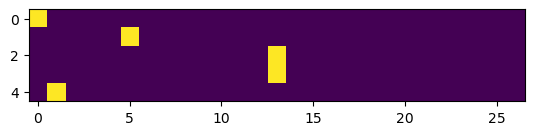

In [10]:
import matplotlib.pyplot as plt

plt.imshow(xenc[:5])

In [11]:
xenc.dtype

torch.float32

In [5]:
# randomly initialize 27 neurons weights, each neuron recieves
# a one-hot encoded input of size 27
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True)
(W**2).mean()

tensor(0.9665, grad_fn=<MeanBackward0>)

In [22]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float()
logits = xenc @ W
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True)
loss = -probs[torch.arange(5), ys].log().mean()
# last 2 lines is 'softmax' function

In [19]:
# backward pass 
W.grad = None # set gradient to 0 effeciently
loss.backward()

In [20]:
# now that we have the gradient, we can update the weights
# only one layer, so we can do it manually
W.data += -0.1 * W.grad

3.7291626930236816
